In [3]:
import sklearn
import matplotlib.pyplot as plt
import pandas
from sklearn.cross_validation import train_test_split
import numpy

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
tweets= pandas.read_csv("Sentiment.csv") #loaded our datset from kaggle into a pandas dataframe
tweets.head() #printed its first 5 entries

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [5]:
tweets=tweets[['text','sentiment']] #selected the two fields of text and sentiment from the whole data

In [6]:
#converting the sentiments into integeral vaues for easier computation
def transformSentiment(x):
    if x=='Neutral':
        return 0
    elif x=='Negative':
        return -1
    else:
        return 1

In [7]:
tweets['sentiment']=tweets['sentiment'].apply(transformSentiment) #applied the transformation to change the sentiment column values to string

In [8]:
tweets.head() #dropped the useless columns 

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,0
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,1
2,RT @TJMShow: No mention of Tamir Rice and the ...,0
3,RT @RobGeorge: That Carly Fiorina is trending ...,1
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,1


In [9]:
mood_count=tweets['sentiment'].value_counts() #we get descending series containing counts of unique values of sentiments in this case they are 3

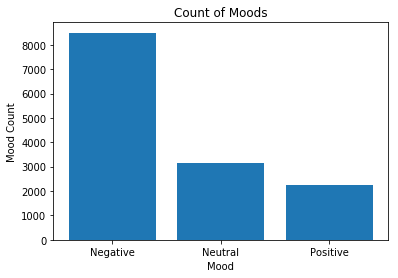

In [10]:
#plotted the sentiment counts as  bar charts
Index = [1,2,3]
plt.bar(Index,mood_count)
plt.xticks(Index,['Negative','Neutral','Positive'])
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')
plt.show()

## Word Cloud for the Tweets

In [11]:
from wordcloud import WordCloud,STOPWORDS
import re
from nltk.corpus import stopwords

In [12]:
#cleaning our text to remove unwanted characters so we can focus on meaningful words
def cleanedWords(raw_tweet):
    raw_tweet=raw_tweet.replace("RT","")
    raw_tweet=re.sub("@\w+:?", "",raw_tweet)
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    words = letters_only.lower().split()                            
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words
                       if 'http' not in w
                       and w not in ["gopdebate","gopdebates"]
                       and w not in stops]
    return meaningful_words

In [13]:
#helper function to plot the wordclouds as shown below
def getWordCloud(Tweet, sentiment):
    df=Tweet[Tweet['sentiment'] == sentiment]
    words = ' '.join(df['text'])
    cleaned_word = " ".join(cleanedWords(words))
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     )
    wordcloud.generate(cleaned_word)
    plt.figure(1,figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

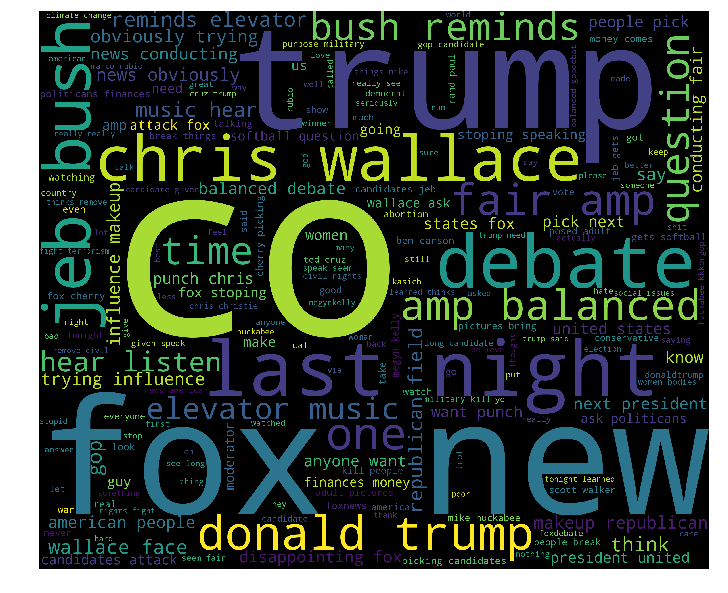

In [14]:
getWordCloud(tweets,-1) #wordcloud for negative tweets

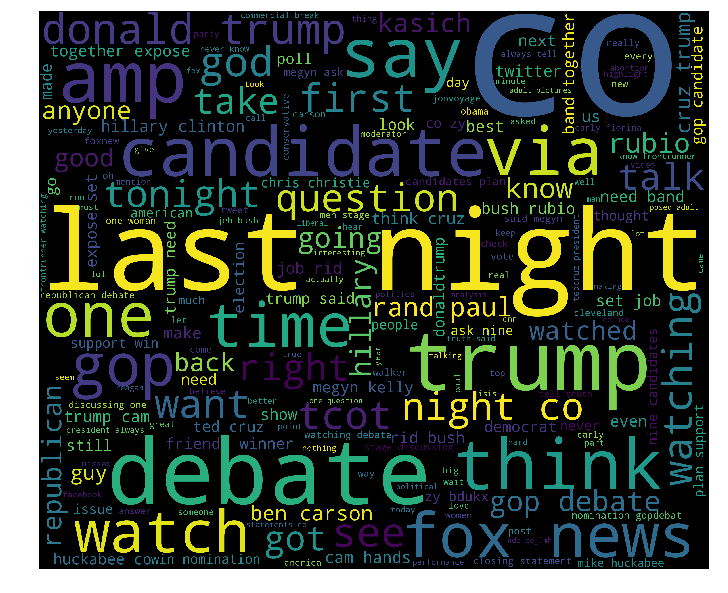

In [15]:
getWordCloud(tweets,0) #word cloud for neutral tweets

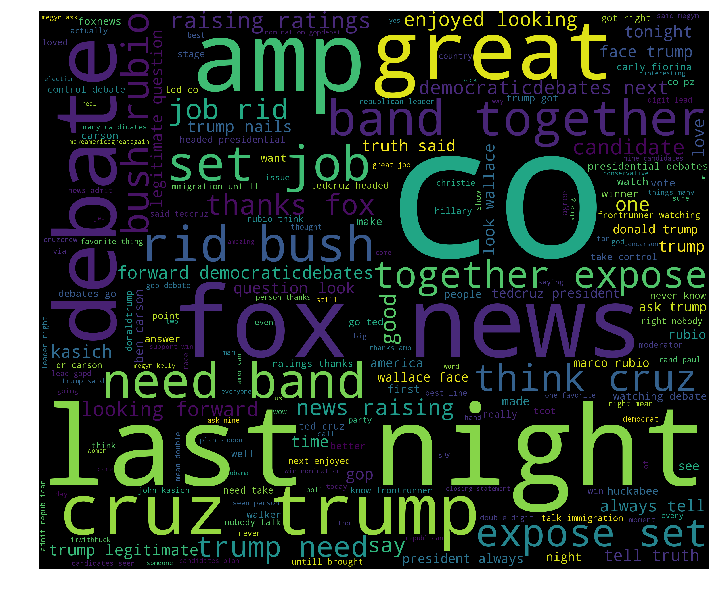

In [16]:
getWordCloud(tweets,1) #word cloud for positive tweets

## Data cleaning 

In [17]:
import nltk

In [18]:
def tweet_to_words(raw_tweet):
    return( " ".join( cleanedWords(raw_tweet) ))

In [19]:
tweets['clean_tweet']=tweets['text'].apply(lambda x: tweet_to_words(x))

In [20]:
tweets[['clean_tweet','text']].head()

,clean_tweet,text
0,everyone feel climate change question last nig...,RT @NancyLeeGrahn: How did everyone feel about...
1,catch full last night scott best lines seconds...,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,mention tamir rice held cleveland wow,RT @TJMShow: No mention of Tamir Rice and the ...
3,carly fiorina trending hours debate men comple...,RT @RobGeorge: That Carly Fiorina is trending ...
4,w delivered highest ratings history presidenti...,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...


In [21]:
train,test = train_test_split(tweets,test_size=0.1,random_state=42) #dividing our datset into training and testing sets (train size 90% of datset while test size is 10%)

In [22]:
#converting our text into text feature by tokenization and word count
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train['clean_tweet'].values)
test_features=v.transform(test['clean_tweet'].values)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [24]:
#the lsit of different classifier/algorithms we wanted to apply on our dataset
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    RandomForestClassifier(n_estimators=200),
    GaussianNB()]

In [25]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))

Accuracy of LogisticRegression is 0.6095100864553314
Accuracy of KNeighborsClassifier is 0.5842939481268011
Accuracy of SVC is 0.6095100864553314
Accuracy of RandomForestClassifier is 0.6772334293948127
Accuracy of GaussianNB is 0.4243515850144092


## Compare the model performances

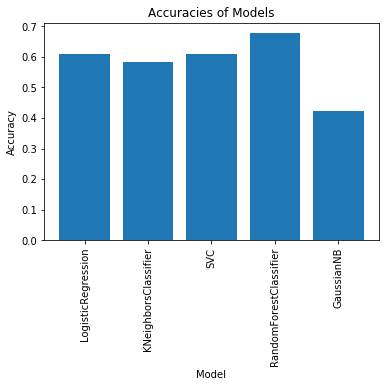

In [26]:
Index = [1,2,3,4,5]
plt.bar(Index, Accuracy)
plt.xticks(Index, Model, rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')
plt.show()

## In this notebook we are trying to train our algorithms on our training set such that when it will read a text from the test set, it wi ll be able to tell to which one of the 3 categories the text belong (positive,neutral,negative) 
 ## We compared the accuracies of these 5 algorithms and Random Forest seems to be the best choice for this classification